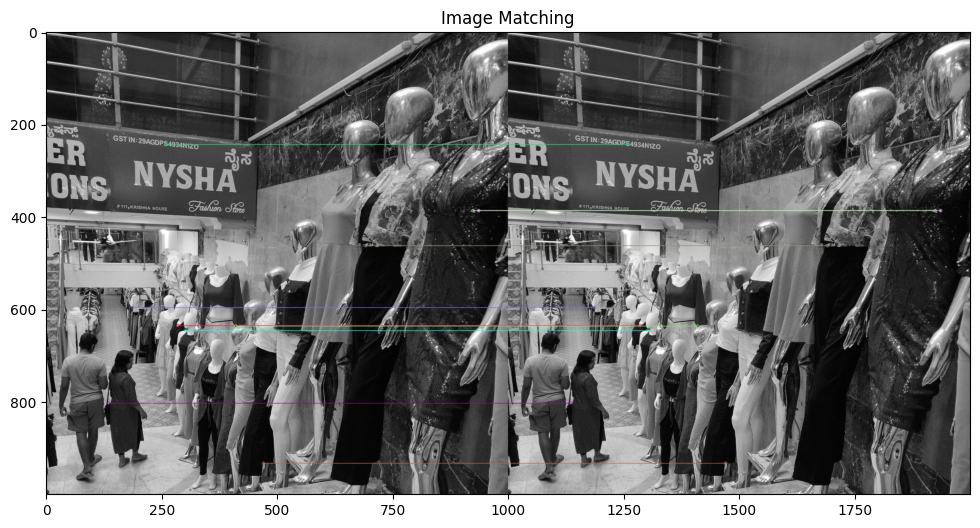

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images
img1 = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)  # Query image
img2 = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)  # Train image

# Initialize ORB detector (or use SIFT if you have access to the opencv_contrib package)
orb = cv2.ORB_create()

# Find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Create a brute force matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(des1, des2)

# Sort them in ascending order of distance
matches = sorted(matches, key = lambda x: x.distance)

# Draw the matches
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Show the result
plt.figure(figsize=(12, 6))
plt.imshow(img_matches)
plt.title('Image Matching')
plt.show()


In [14]:
from tkinter import Tk, filedialog  # Ensure this line is included


In [3]:
!pip install tensorflow matplotlib


   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   --- ------------------------------------ 0.2/3.0 MB 4.8 MB/s eta 0:00:01
   --------- ------------------------------ 0.7/3.0 MB 7.7 MB/s eta 0:00:01
   ----------------- ---------------------- 1.3/3.0 MB 9.0 MB/s eta 0:00:01
   --------------------------- ------------ 2.1/3.0 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------  2.9/3.0 MB 10.4 MB/s eta 0:00:01
   ---------------------------------------  3.0/3.0 MB 10.6 MB/s eta 0:00:01
   ---------------------------------------  3.0/3.0 MB 10.6 MB/s eta 0:00:01
   ---------------------------------------- 3.0/3.0 MB 8.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/413.4 kB ? eta -:--:--
   --------------------------------------- 413.4/413.4 kB 13.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/106.3 kB ? eta -:--:--
   ---------------------------------------- 106.3/106.3 kB 3.0 MB/s eta 0:00:00
   --------------

In [55]:
import matplotlib.pyplot as plt
from tkinter import Tk, filedialog
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np

# Define the base model (e.g., CNN with Conv2D layers)
def create_base_model(input_shape):
    base_input = layers.Input(input_shape)
    x = layers.Conv2D(64, (3, 3), activation='relu')(base_input)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    return Model(base_input, x)

# Define the Siamese network architecture
def create_siamese_model(input_shape):
    base_model = create_base_model(input_shape)
    input_1 = layers.Input(input_shape)
    input_2 = layers.Input(input_shape)

    # Generate the embeddings for both inputs
    embedding_1 = base_model(input_1)
    embedding_2 = base_model(input_2)

    # Compute the distance between the two embeddings
    distance = layers.Lambda(lambda tensors: tf.abs(tensors[0] - tensors[1]))([embedding_1, embedding_2])
    distance = layers.Dense(1, activation="sigmoid")(distance)  # Output similarity score

    return Model([input_1, input_2], distance)

# Preprocess the images: Resize, normalize, and expand the dimensions
def preprocess_data(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(100, 100))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0  # Normalize the images
    return img

# Function to open a file dialog for uploading images
def upload_image():
    root = Tk()
    root.withdraw()  # Hide the main tkinter window
    file_path = filedialog.askopenfilename(title="Select an Image", filetypes=[("Image files", "*.jpg;*.jpeg;*.png")])
    root.destroy()  # Close the tkinter window
    return file_path

# Load and preprocess all images
img1 = preprocess_data("1.jpg")
img2 = preprocess_data("2.jpg")
img3 = preprocess_data("3.jpg")
img4 = preprocess_data("4.jpg")
img5 = preprocess_data("5.jpg")
img6 = preprocess_data("6.jpg")
img7 = preprocess_data("7.jpg")
img8 = preprocess_data("8.jpg")
img9 = preprocess_data("9.jpg")
img10 = preprocess_data("10.jpg")
img11 = preprocess_data("11.jpg")
img12 = preprocess_data("12.jpg")
img13 = preprocess_data("13.jpg")
img14 = preprocess_data("14.jpg")
img15 = preprocess_data("15.jpg")
img16 = preprocess_data("16.jpg")
img17 = preprocess_data("17.jpg")
img18 = preprocess_data("18.jpg")

# Create image pairs and labels
image_pairs = [
    (img1, img2), (img3, img4), (img5, img6), (img7, img8), 
    (img9, img10), (img11, img12), (img13, img14), (img15, img16), (img17, img18)
]
y_train = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1])  # Labels for each pair

# Separate image pairs into two arrays
X_train_1 = np.array([pair[0] for pair in image_pairs])
X_train_2 = np.array([pair[1] for pair in image_pairs])

# Define input shape
input_shape = (100, 100, 3)

# Instantiate the model
siamese_model = create_siamese_model(input_shape)
siamese_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
siamese_model.fit([X_train_1, X_train_2], y_train, epochs=20, batch_size=32)


# Perform matching with an uploaded image
print("Upload an image to match:")
uploaded_img_path = upload_image()
if uploaded_img_path:
    uploaded_img = preprocess_data(uploaded_img_path)
    uploaded_img = np.expand_dims(uploaded_img, axis=0)

    # Find the best match
    highest_similarity = 0
    matched_idx = None
    for idx, img in enumerate([img1, img3, img5, img7, img9, img11, img13, img15, img17]):
        similarity_score = siamese_model.predict([np.expand_dims(img, axis=0), uploaded_img])[0][0]
        if similarity_score > highest_similarity:
            highest_similarity = similarity_score
            matched_idx = idx
# Print the result
    if highest_similarity >= 0.5:
        print(f"Match found! Similarity Score: {highest_similarity}")
    else:
        print(f"No match found. Similarity Score: {highest_similarity}")
    

Epoch 1/20


C:\Users\Nidhithashree k\anaconda\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_247', 'keras_tensor_248']. Received: the structure of inputs=('*', '*')
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5556 - loss: 0.6939
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.7778 - loss: 0.5603
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 1.0000 - loss: 0.1218
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 1.0000 - loss: 0.0092
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 1.0000 - loss: 6.4277e-04
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 1.0000 - loss: 5.0650e-05
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 1.0000 - loss: 4.3506e-06
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 1.0000 - loss: 4.0303e-07
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 1.0000 - loss: 3.9620e-08
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 1.0000 - loss: 4.2623e-09
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 1.0000 - loss: 5.0457e-10
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accurac

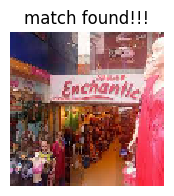

In [67]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Assuming 'uploaded_img' is your loaded image
plt.figure(figsize=(2, 2), dpi=100)  # Reduce figure size, increase DPI for better resolution
plt.imshow(tf.keras.preprocessing.image.array_to_img(uploaded_img[0]), interpolation='nearest')  # Use 'nearest' for clear pixels
plt.title("match found!!!")
plt.axis("off")  # Remove axes for a cleaner display
plt.show()



In [ ]:
def display_uploaded_image(uploaded_img_path):
    # Open the uploaded image using PIL and display at a larger size
    img = Image.open(uploaded_img_path)
    img = img.resize((600, 600), Image.ANTIALIAS)  # Resize to a larger size for clarity
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.title("Uploaded Image")
    plt.axis("off")  # Hide axes for clean display
    plt.show()